In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
df=pd.read_csv('College.csv')

In [5]:
def converter(private):
    if private=='Yes':
        return 1
    else:
        return 0

In [6]:
df['Cluster']=df['Private'].apply(converter)

In [8]:
df1=df[['Apps','Accept','Enroll','Top10perc','Top25perc','F.Undergrad','P.Undergrad','Outstate','Room.Board','Books','Personal','PhD','Terminal','S.F.Ratio','perc.alumni','Expend','Grad.Rate','Cluster']]

In [9]:
df1

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1
5,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55,1
6,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63,1
7,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73,1
8,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80,1
9,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52,1


In [10]:
#apply preprocessing

In [11]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler=StandardScaler()

In [14]:
scaler.fit(df1.drop('Cluster',axis=1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
#tranform 

In [18]:
scaled_features=  scaler.transform(df1.drop('Cluster',axis=1))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


#recreate features using dataframe

In [19]:
df_feat=pd.DataFrame(scaled_features,columns=df1.columns[:-1])

In [21]:
df_feat.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


In [22]:
#split data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X=df_feat

In [25]:
y=df['Cluster']

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [30]:
#Apply KNN model

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn=KNeighborsClassifier(n_neighbors=1)

In [38]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [39]:
predictions=knn.predict(X_test)

In [43]:
#classification report

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        58
           1       0.93      0.94      0.94       176

   micro avg       0.90      0.90      0.90       234
   macro avg       0.87      0.86      0.87       234
weighted avg       0.90      0.90      0.90       234



In [47]:
print(confusion_matrix(y_test,predictions))

[[ 45  13]
 [ 10 166]]


In [48]:
#finding error and plotting for different values

In [49]:
error_rate=[]

In [52]:
for i in range(1,40):
    knn1=KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X_train,y_train)
    predictions_i=knn1.predict(X_test)
    error_rate.append(np.mean(predictions_i!= y_test))

In [57]:
error_rate

[0.09829059829059829,
 0.10256410256410256,
 0.07264957264957266,
 0.06837606837606838,
 0.06837606837606838,
 0.05982905982905983,
 0.0641025641025641,
 0.0641025641025641,
 0.06837606837606838,
 0.0641025641025641,
 0.07264957264957266,
 0.07264957264957266,
 0.07692307692307693,
 0.07264957264957266,
 0.07264957264957266,
 0.07264957264957266,
 0.07264957264957266,
 0.0641025641025641,
 0.07264957264957266,
 0.0641025641025641,
 0.06837606837606838,
 0.0641025641025641,
 0.0641025641025641,
 0.0641025641025641,
 0.0641025641025641,
 0.0641025641025641,
 0.06837606837606838,
 0.06837606837606838,
 0.07264957264957266,
 0.06837606837606838,
 0.07264957264957266,
 0.06837606837606838,
 0.07692307692307693,
 0.07264957264957266,
 0.07692307692307693,
 0.07692307692307693,
 0.07692307692307693,
 0.07692307692307693,
 0.07692307692307693]

In [53]:
#plot figure of errors and determine various factors like at which value error is least 

In [54]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

Text(0, 0.5, 'error_rate')

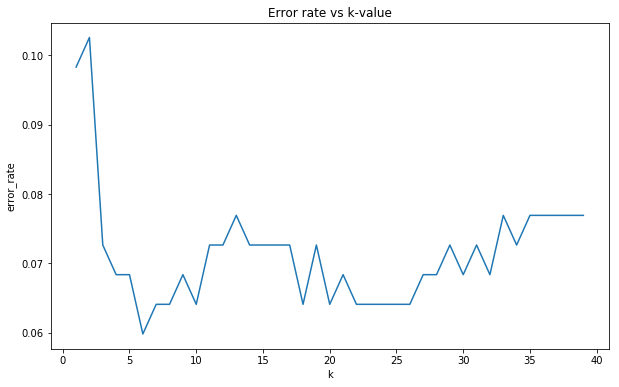

In [61]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate)
plt.title('Error rate vs k-value')
plt.xlabel('k')
plt.ylabel('error_rate')

In [66]:
#from the plot we can see least number of error is in 6 value

In [67]:
#so take neighbors as 6

In [63]:
knn2= KNeighborsClassifier(n_neighbors=6)
knn2.fit(X_train,y_train)
predictions3= knn2.predict(X_test)



In [65]:
print(classification_report(y_test,predictions3))

              precision    recall  f1-score   support

           0       0.91      0.84      0.88        58
           1       0.95      0.97      0.96       176

   micro avg       0.94      0.94      0.94       234
   macro avg       0.93      0.91      0.92       234
weighted avg       0.94      0.94      0.94       234

